In [2]:
import numpy as np
import pandas as pd


1.5.3


In [4]:
data=pd.read_csv("files/New_set.csv")
data

,City,Age,Salary,Eligible for Bonus
0,Mumbai,27.0,51000.0,Yes
1,Mumbai,30.0,52000.0,No
2,Newyork,27.0,48000.0,Yes
3,Newyork,NaN,66000.0,No
4,Tokyo,48.0,NaN,Yes
5,Singapore,33.0,69000.0,No
6,Newyork,40.0,79000.0,Yes
7,Mumbai,38.0,NaN,Yes
8,Singapore,35.0,38000.0,No
9,Tokyo,NaN,56000.0,No


In [5]:
data.columns

Index(['City', 'Age', 'Salary', 'Eligible for Bonus'], dtype='object')

In [6]:
data.describe()

,Age,Salary
count,11.000000,11.000000
mean,34.636364,58636.363636
std,6.152605,12395.747071
min,27.000000,38000.000000
25%,30.500000,50000.000000
50%,35.000000,56000.000000
75%,37.500000,67500.000000
max,48.000000,79000.000000


# creating the independent and dependent variable vectors.

In [9]:
# create dependent and independent variable vectors,
x=data.iloc[:,:-1].values
x
# These are all the independent variable vectors from the dataframe.

array([['Mumbai', 27.0, 51000.0],
       ['Mumbai', 30.0, 52000.0],
       ['Newyork', 27.0, 48000.0],
       ['Newyork', nan, 66000.0],
       ['Tokyo', 48.0, nan],
       ['Singapore', 33.0, 69000.0],
       ['Newyork', 40.0, 79000.0],
       ['Mumbai', 38.0, nan],
       ['Singapore', 35.0, 38000.0],
       ['Tokyo', nan, 56000.0],
       ['Singapore', 35.0, 72000.0],
       ['Mumbai', 31.0, 65000.0],
       ['Singapore', 37.0, 49000.0]], dtype=object)

In [33]:
y=data.iloc[:,-1].values
y
# here i get the dependent variable vector from the dataframe.which is a last series from the datafram.

array(['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No'], dtype=object)

# Handling the missing values. Data preprocessing

In [13]:
data

,City,Age,Salary,Eligible for Bonus
0,Mumbai,27.0,51000.0,Yes
1,Mumbai,30.0,52000.0,No
2,Newyork,27.0,48000.0,Yes
3,Newyork,NaN,66000.0,No
4,Tokyo,48.0,NaN,Yes
5,Singapore,33.0,69000.0,No
6,Newyork,40.0,79000.0,Yes
7,Mumbai,38.0,NaN,Yes
8,Singapore,35.0,38000.0,No
9,Tokyo,NaN,56000.0,No


In [14]:
# to calclulate the count for missing values in the dataframe
print(data.isnull().sum())

City                  0
Age                   2
Salary                2
Eligible for Bonus    0
dtype: int64


In [15]:
# to drop the missing values.
data.dropna(inplace=True)

In [16]:
data

,City,Age,Salary,Eligible for Bonus
0,Mumbai,27.0,51000.0,Yes
1,Mumbai,30.0,52000.0,No
2,Newyork,27.0,48000.0,Yes
5,Singapore,33.0,69000.0,No
6,Newyork,40.0,79000.0,Yes
8,Singapore,35.0,38000.0,No
10,Singapore,35.0,72000.0,Yes
11,Mumbai,31.0,65000.0,Yes
12,Singapore,37.0,49000.0,No


In [20]:
data=pd.read_csv("files/New_set.csv")
data

,City,Age,Salary,Eligible for Bonus
0,Mumbai,27.0,51000.0,Yes
1,Mumbai,30.0,52000.0,No
2,Newyork,27.0,48000.0,Yes
3,Newyork,NaN,66000.0,No
4,Tokyo,48.0,NaN,Yes
5,Singapore,33.0,69000.0,No
6,Newyork,40.0,79000.0,Yes
7,Mumbai,38.0,NaN,Yes
8,Singapore,35.0,38000.0,No
9,Tokyo,NaN,56000.0,No


In [23]:
# use the replace concept for missing values
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='mean') # here i created a object for simpleimputer class
impute.fit(x[:,1:3]) # since our 2nd and 3rd column contain the missing values.
x[:,1:3]=impute.transform(x[:,1:3])
x[:,1:3]

# here we can see that the missing values are filled with mean of their respective column.

array([[27.0, 51000.0],
       [30.0, 52000.0],
       [27.0, 48000.0],
       [34.63636363636363, 66000.0],
       [48.0, 58636.36363636364],
       [33.0, 69000.0],
       [40.0, 79000.0],
       [38.0, 58636.36363636364],
       [35.0, 38000.0],
       [34.63636363636363, 56000.0],
       [35.0, 72000.0],
       [31.0, 65000.0],
       [37.0, 49000.0]], dtype=object)

# Encoding in preprocessing


### One Hot Encoding

In [29]:
# In my dataframe, the first column contains string values , for a better preprocessing we convert that into binary format.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x1=np.array(ct.fit_transform(x))
print(x1)

[[1.0 0.0 0.0 0.0 27.0 51000.0]
 [1.0 0.0 0.0 0.0 30.0 52000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [0.0 1.0 0.0 0.0 34.63636363636363 66000.0]
 [0.0 0.0 0.0 1.0 48.0 58636.36363636364]
 [0.0 0.0 1.0 0.0 33.0 69000.0]
 [0.0 1.0 0.0 0.0 40.0 79000.0]
 [1.0 0.0 0.0 0.0 38.0 58636.36363636364]
 [0.0 0.0 1.0 0.0 35.0 38000.0]
 [0.0 0.0 0.0 1.0 34.63636363636363 56000.0]
 [0.0 0.0 1.0 0.0 35.0 72000.0]
 [1.0 0.0 0.0 0.0 31.0 65000.0]
 [0.0 0.0 1.0 0.0 37.0 49000.0]]


In the above code remainder='passthrough' gives the other columns remains unchanged. if i pass the remainder='drop' the other 
columns are deleted. Here i only pass [0] , which means i want to transform the first column only,which is only in string format.Here i used the OneHotEncoder class.
The above output i can see that they give different binary values into four places in our dataframe and kept the other columns unchanged.

# Label Encoding

In [35]:
# next we learn about label encoding.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[1 0 1 0 1 0 1 1 0 0 1 1 0]


Now you can see that above , the 'yes' and 'No' are changes into 1 and 0.


# Convert Dataset into Test and Train data

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[1.0 0.0 0.0 0.0 30.0 52000.0]
 [0.0 1.0 0.0 0.0 40.0 79000.0]
 [1.0 0.0 0.0 0.0 27.0 51000.0]
 [1.0 0.0 0.0 0.0 38.0 58636.36363636364]
 [0.0 0.0 1.0 0.0 37.0 49000.0]
 [0.0 0.0 0.0 1.0 34.63636363636363 56000.0]
 [0.0 0.0 1.0 0.0 35.0 38000.0]
 [1.0 0.0 0.0 0.0 31.0 65000.0]
 [0.0 0.0 1.0 0.0 33.0 69000.0]]
[[0.0 1.0 0.0 0.0 27.0 48000.0]
 [0.0 1.0 0.0 0.0 34.63636363636363 66000.0]
 [0.0 0.0 0.0 1.0 48.0 58636.36363636364]
 [0.0 0.0 1.0 0.0 35.0 72000.0]]
[0 1 1 1 0 0 0 1 0]
[1 0 1 1]


Here the test_size=0.25 means that the 25% of the dataset becomes test set and remaining 75% of datas are train set.
Here we use random_state , for selecting datas in randomlly.
Here x_train x_test are independent values from our dataframe and y_train y_test are dependent values.

# Feature scaling-Normalization and Standardization

In [39]:
print(x_train)

[[1.0 0.0 0.0 0.0 30.0 52000.0]
 [0.0 1.0 0.0 0.0 40.0 79000.0]
 [1.0 0.0 0.0 0.0 27.0 51000.0]
 [1.0 0.0 0.0 0.0 38.0 58636.36363636364]
 [0.0 0.0 1.0 0.0 37.0 49000.0]
 [0.0 0.0 0.0 1.0 34.63636363636363 56000.0]
 [0.0 0.0 1.0 0.0 35.0 38000.0]
 [1.0 0.0 0.0 0.0 31.0 65000.0]
 [0.0 0.0 1.0 0.0 33.0 69000.0]]


here we can see that the scale of 4th column in between 30 to 50 . And the scale of the 5 th column is between thousands.
We want to convert all the values in the same scale, that's why model learns fastly when compared to the unscaled data.
This process is called Feature scaling.
For Feature scaling we have two methods first one is Standradization and second one is Normalizaiton.

In [49]:
# if i want to change the scales for 4th and 5th columns.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[:,4:]=scaler.fit_transform(x_train[:,4:])
x_test[:,4:]=scaler.fit_transform(x_test[:,4:])
print(x_train)
print("\n")
print(x_test)


[[1.0 0.0 0.0 0.0 -1.0134309057872253 -0.48180192610203115]
 [0.0 1.0 0.0 0.0 1.545999187910104 1.8769097011337363]
 [1.0 0.0 0.0 0.0 -1.7812599338964241 -0.5691616159996521]
 [1.0 0.0 0.0 0.0 1.0341131691706382 0.09794874321854496]
 [0.0 0.0 1.0 0.0 0.7781701598009053 -0.7438809957948942]
 [0.0 0.0 0.0 1.0 0.1732139558360812 -0.13236316651154711]
 [0.0 0.0 1.0 0.0 0.2662841410614394 -1.7048375846687251]
 [1.0 0.0 0.0 0.0 -0.7574878964174924 0.6538740425670421]
 [0.0 0.0 1.0 0.0 -0.24560187767802644 1.0033128021575264]]


[[0.0 1.0 0.0 0.0 -1.213794856790145 -1.4701162060918802]
 [0.0 1.0 0.0 0.0 -0.20179715981374655 0.5408199514638522]
 [0.0 0.0 0.0 1.0 1.569198809894952 -0.2818357493544016]
 [0.0 0.0 1.0 0.0 -0.15360679329106044 1.2111320039824296]]


Now all the columns scales becomes same range.

# Finding the outliers in the dataset

In [68]:
dataset=pd.read_csv("files/New_set2.csv")
dataset

,City,Age,Salary,Eligible for Bonus
0,Mumbai,27,51000,Yes
1,Mumbai,30,52000,No
2,Newyork,20,48000,Yes
3,Newyork,29,66000,No
4,Tokyo,48,60000,Yes
5,Singapore,33,69000,No
6,Newyork,40,79000,Yes
7,Mumbai,38,80000,Yes
8,Singapore,35,38000,No
9,Tokyo,34,56000,No


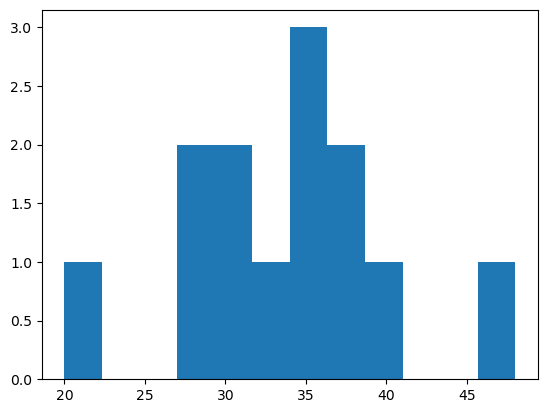

In [69]:
import matplotlib.pyplot as plt
plt.hist(dataset['Age'],bins=12)
plt.show()

so here the age above 45 are considered as the outliers in the given dataframe.

In [70]:
# we can find both upper and lower outliers.Here i used 0.05 for representing 5%
lowerlimit=dataset['Age'].quantile(0.05)
lowerlimit

24.2

In [71]:
upperlimit=dataset['Age'].quantile(0.95)  # here i used 0.95 for representing 95%
upperlimit

43.19999999999999

so we can say that below 27 they are outliers.And above 43.199 are also outliers.

In [72]:
dataset['Age'][dataset['Age']>upperlimit]

4    48
Name: Age, dtype: int64

In [73]:
dataset['Age'][dataset['Age']<lowerlimit]

2    20
Name: Age, dtype: int64

there is only one outlier which is 48 , there is no outlier below the lowerlimit.we want to remove the 48.

In [77]:
newdataset=dataset[(dataset['Age']>lowerlimit) &  (dataset['Age']<upperlimit)]
print(newdataset)

         City  Age  Salary Eligible for Bonus
0      Mumbai   27   51000                Yes
1      Mumbai   30   52000                 No
3     Newyork   29   66000                 No
5   Singapore   33   69000                 No
6     Newyork   40   79000                Yes
7      Mumbai   38   80000                Yes
8   Singapore   35   38000                 No
9       Tokyo   34   56000                 No
10  Singapore   35   72000                Yes
11     Mumbai   31   65000                Yes
12  Singapore   37   49000                 No


In this dataframe does not contains the outliers.

# converting the Ordinal data into numerical value.

In [23]:
import pandas as pd
data=pd.read_csv("files/cricketers.csv")
data

,Name,Age,Grade,Role,Rating,Country
0,Virat,31,Best,Batsman,871,IND
1,Rohit,33,Better,Batsman,855,IND
2,Babar,25,Good,Batsman,829,PAK
3,Boult,31,Best,Bowler,722,NZ
4,Bumrah,26,Better,Bowler,719,IND
5,Mujeeb,19,Good,Bowler,701,AFG
6,Nabi,35,Best,All-rounder,301,AFG
7,Stokes,29,Better,All-rounder,285,ENG


In [80]:
dictmap={
    "Best":1,
    "Better":2,
    "Good":3
}

In [81]:
data['Numeric']=data['Grade'].map(dictmap)

In [82]:
data

,Name,Age,Grade,Role,Rating,Country,Numeric
0,Virat,31,Best,Batsman,871,IND,1
1,Rohit,33,Better,Batsman,855,IND,2
2,Babar,25,Good,Batsman,829,PAK,3
3,Boult,31,Best,Bowler,722,NZ,1
4,Bumrah,26,Better,Bowler,719,IND,2
5,Mujeeb,19,Good,Bowler,701,AFG,3
6,Nabi,35,Best,All-rounder,301,AFG,1
7,Stokes,29,Better,All-rounder,285,ENG,2


so we get the correponding grade values.

# Continuous variables into binning/Discritization/Quantization

In [24]:
def binningFunction(col,cut_points,labels=None):
    min_val=col.min()
    max_val=col.max()
    break_points=[min_val]+cut_points+[max_val]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
    col_bin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return col_bin

cut_points=[25,30]
labels=["young","senior","supersenior"]
data["Exp_catogory"]=binningFunction(data['Age'],cut_points,labels)
data

[19, 25, 30, 35]


,Name,Age,Grade,Role,Rating,Country,Exp_catogory
0,Virat,31,Best,Batsman,871,IND,supersenior
1,Rohit,33,Better,Batsman,855,IND,supersenior
2,Babar,25,Good,Batsman,829,PAK,young
3,Boult,31,Best,Bowler,722,NZ,supersenior
4,Bumrah,26,Better,Bowler,719,IND,senior
5,Mujeeb,19,Good,Bowler,701,AFG,young
6,Nabi,35,Best,All-rounder,301,AFG,supersenior
7,Stokes,29,Better,All-rounder,285,ENG,senior


In [64]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est=preprocessing.KBinsDiscretizer(n_bins=[3,2,2],encode='ordinal').fit(X)

In [65]:
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [91]:
data

,Name,Age,Grade,Role,Rating,Country,Numeric,Exp_catogory
0,Virat,31,Best,Batsman,871,IND,1,supersenior
1,Rohit,33,Better,Batsman,855,IND,2,supersenior
2,Babar,25,Good,Batsman,829,PAK,3,young
3,Boult,31,Best,Bowler,722,NZ,1,supersenior
4,Bumrah,26,Better,Bowler,719,IND,2,senior
5,Mujeeb,19,Good,Bowler,701,AFG,3,young
6,Nabi,35,Best,All-rounder,301,AFG,1,supersenior
7,Stokes,29,Better,All-rounder,285,ENG,2,senior


# removing duplicates

In [93]:
data=pd.read_csv("files/vehicle.csv")
data

,Company,fuel-type,num-of-doors,body-style,num-of-cylinderes
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
2,bmw,gas,2,sedan,four
3,bmw,gas,2,sedan,four
4,bmw,gas,2,sedan,six
5,mercedes-benz,diesel,4,sedan,five
6,mercedes-benz,diesel,4,wagon,five


In [94]:
data.duplicated()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
dtype: bool

In [96]:
new=data.drop_duplicates()
new

,Company,fuel-type,num-of-doors,body-style,num-of-cylinderes
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
2,bmw,gas,2,sedan,four
4,bmw,gas,2,sedan,six
5,mercedes-benz,diesel,4,sedan,five
6,mercedes-benz,diesel,4,wagon,five


In [101]:
new=data.drop_duplicates(subset=['Company'])
new

,Company,fuel-type,num-of-doors,body-style,num-of-cylinderes
0,audi,gas,2,sedan,five
2,bmw,gas,2,sedan,four
5,mercedes-benz,diesel,4,sedan,five


# Standradization ,or mean removal and varience scaling.

In [2]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [5]:
scaler=preprocessing.StandardScaler().fit(X_train)
print(scaler)


StandardScaler()


In [9]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [10]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [12]:
X_scaled=scaler.transform(X_train)
print(X_train)

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]


In [14]:
X_scaled.mean(axis=0)


array([0., 0., 0.])

In [15]:
X_scaled.std(axis=0)

array([1., 1., 1.])

# Scaling feature to a range

In [18]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
minmax_scaler=preprocessing.MinMaxScaler()
X_train_minmax=minmax_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

There is another scaling feature MaxabsScaler but it's values is ranges from -1 to 0. where as in minmaxscaler it is 0 and 1

In [21]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
maxabs_scaler=preprocessing.MaxAbsScaler()
X_train_maxabs=maxabs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [27]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer=RobustScaler().fit(X)
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

# centering kernel matrix

In [30]:
import numpy as np
X=np.array([[1,2,3],
           [3,2,1],
           [2,1,3]])
X

array([[1, 2, 3],
       [3, 2, 1],
       [2, 1, 3]])

In [33]:
from sklearn import preprocessing
scaler=preprocessing.KernelCenterer().fit(X)
scaler.K_fit_rows_
# this is the column mean

array([2.        , 1.66666667, 2.33333333])

In [36]:
scaler.K_fit_all_
#This is the total mean

2.0

In [38]:
X_centered=scaler.transform(X)
X_centered

array([[-1.        ,  0.33333333,  0.66666667],
       [ 1.        ,  0.33333333, -1.33333333],
       [ 0.        , -0.66666667,  0.66666667]])

In [39]:
np.mean(X_centered).round(2)

-0.0

# Non linear Transformation

#### Uniform Distribution

In [50]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
X,y=load_iris(return_X_y=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=0)
quantiletrans=preprocessing.QuantileTransformer(random_state=0)
X_train_trans=quantiletrans.fit_transform(X_train)
X_test_trans=quantiletrans.transform(X_test)
np.percentile(X_train[:,0],[0, 25, 50, 75, 100])



C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.5, 7.9])

#### Gauasian distribution

In [55]:
pt=preprocessing.PowerTransformer(method="box-cox",standardize=False)
X_lognormal=np.random.RandomState(616).lognormal(size=(3,3))
pt.fit_transform(X_lognormal)

array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863195, -0.57612414],
       [ 0.69420009, -0.84857822,  0.10051454]])

### Normalization

In [ ]:
# X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized=preprocessing.normalize(X,norm="l2")
X_normalized
# here the l2 refers to euclidean normalization,involves scaling each row of the matrix such that the 
#sum of the squares of the row elements equals 1. 
#This is done by dividing each element of the row by the Euclidean norm of the row.

### Feature binarization

Feature binarization is the process of thresholding numerical features to get boolean values.

In [68]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer=preprocessing.Binarizer().fit(X)
binarizer.transform()

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

# Generating Polynomial features

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X=np.arange(6).reshape(3,2)
X


array([[0, 1],
       [2, 3],
       [4, 5]])

In [16]:
poly=PolynomialFeatures(2)
poly.fit_transform(X)
#Here i creating a polynomial feature of degree 2.and using that we transform it.


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

The output will get like 
column1:ones,column2:first column from X,column3:2nd column from X,column4:square of first column in X,
column5:products of 2 columns in X,column6:square of 2nd column in X.
This method is used to understand the nonlinear relationships between target variables.

if we want only interactions then we can set interactio_only=True.

In [19]:
X=np.arange(0,9).reshape(3,3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
poly=PolynomialFeatures(degree=3,interaction_only=True)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])